# Generation of data
Vicente A. Arévalo

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit as cv

#  Hydra analysis

In [2]:
key1="Hydra"
key2="Norma"

In [3]:
contenido = os.listdir("/home/vicente/cold_hi_project/High-lat_Yachay (1)/ATCA_HI_spectra/"+key1) # to get acces to the files in the directory

In [4]:
# Clasifying the data depending on the velocity resolution
v2=[]
v4=[]
for i in contenido:
    if "v" in i:     #Low velocities
        v2.append(i.split('.')[0]) 
    if "k" in i:     #high velocities
        v4.append(i.split('.')[0])

## Functions to work

In [5]:
#creating a list in order to get the full path of the required file
def full_path(file,folder):
    information=[]
    for i in range(len(file)):
        f="/home/vicente/cold_hi_project/High-lat_Yachay (1)/ATCA_HI_spectra/"+folder+'/'+file[i]+".txt"
        information.append(f)
    return information

In [6]:
# This function allows to calculate the continuum emission line
def continuum1(filename):
    data=pd.read_table(filename) #reading the file
    amplitude=data['Amplitude']
    velocity=np.array(data['velocity'])
    
    def func(x,a,b): # doing the fitting using curve fit.
        return a*velocity+b
    coef, cova=cv(func,velocity, amplitude)
    fitting=np.array(func(velocity,*coef))
    e_tau= np.array(amplitude/fitting)  #e^{-tau} spectrum
    return velocity, e_tau,fitting
    

In [7]:
#the function to calculate the root mean square of the data
def root_mean(x):
    rms = np.sqrt(np.mean(x**2))
    return rms


In [8]:
# this function is important to calculate all the parameters:
# rms, signal to noise, maximum noise, maximum signal, spectral range, standar deviation

def getting_data(file): #the argument is the full path of the file
    maximum= np.abs(np.max(file)-1) #maximum noise
    minimum=np.abs(1-np.min(file)) #maximum signal
    ranges=minimum+maximum #spectral range
    deviation= np.std(file) #standar deviation
    rmsq=root_mean(file) #root mean square
    sn=minimum/maximum  #signal to noise
    return rmsq, deviation,sn, maximum,minimum, ranges

In [9]:
def write(argument1): # the argument must be a tuple with the require operations
    root=[]  #root mean square
    sdeviation=[] #standar deviation
    snoise=[]  #signal to noise
    maxi=[] #maximum signal
    mini=[]  #maximum noise
    srange=[]  #spectral range
    fit=[]
    tau=[]
    vel=[]
    
    for i in argument1:
        # in this part the operations are applied to every file
        root.append(getting_data(continuum1(i)[1])[0])
        sdeviation.append(getting_data(continuum1(i)[1])[1])
        snoise.append(getting_data(continuum1(i)[1])[2])
        maxi.append(getting_data(continuum1(i)[1])[3])
        mini.append(getting_data(continuum1(i)[1])[4])
        srange.append(getting_data(continuum1(i)[1])[5])
        fit.append(continuum1(i)[2])
        tau.append(continuum1(i)[1])
        vel.append(continuum1(i)[0])
    return root, sdeviation, snoise, maxi, mini, srange,fit,tau,vel
            

In [33]:
def histograms(file, title, text): # allow to plot histograms. arguments: data, title of the plot, x_label of the plot; the 
    #last two must be strings
    plt.hist(file, bins=20,color = "lightblue", ec="black")
    plt.xlabel(text)
    plt.ylabel("Counts")
    plt.title(title)
    plt.show()
    

# Hydra analysis

In [12]:
hydra_v2 = pd.DataFrame({'Name': v2, 'rms': write(full_path(v2,key1))[0],
                   'S.Deviation':write(full_path(v2,key1))[1],
                   'S/N':write(full_path(v2,key1))[2],
                  'Max.noise':write(full_path(v2,key1))[3],
                  'Max.signal':write(full_path(v2,key1))[4],
                  'S.Range':write(full_path(v2,key1))[5],
                    'T_cont':write(full_path(v2,key1))[6],
                         'tau':write(full_path(v2,key1))[7],
                        'velocity':write(full_path(v2,key1))[8]})

hydra_v2.to_pickle("Information_Hydra_v2.pkl")

### 4 km/s velocity resolution. 

In [13]:
hydra_v4 = pd.DataFrame({'Name': v4, 'rms': write(full_path(v4,key1))[0],
                   'S.Deviation':write(full_path(v4,key1))[1],
                   'S/N':write(full_path(v4,key1))[2],
                  'Max.noise':write(full_path(v4,key1))[3],
                  'Max.signal':write(full_path(v4,key1))[4],
                  'S.Range':write(full_path(v4,key1))[5],
                        'T_cont':write(full_path(v4,key1))[6],
                         'tau':write(full_path(v4,key1))[7],
                        'velocity':write(full_path(v4,key1))[8]})

hydra_v4.to_pickle("Information_Hydra_v4.pkl")

In [14]:
hydrav2= pd.read_pickle("Information_Hydra_v2.pkl")
hydrav4= pd.read_pickle("Information_Hydra_v4.pkl")


In [20]:
hydrav2

,Name,rms,S.Deviation,S/N,Max.noise,Max.signal,S.Range,T_cont,tau,velocity
0,j101448-2944_cube_v2_atca_spectrum,1.015895,0.179003,1.378702,0.576773,0.795198,1.371971,"[0.05446548298906166, 0.054465059204750706, 0....","[0.6974654022186696, 1.0340818650039654, 0.981...","[-141.731690232, -141.525584069403, -141.31947..."
1,j102229-2647_cube_v2_atca_spectrum,1.021929,0.210568,0.717456,0.833672,0.598123,1.431796,"[0.0741701685644957, 0.07416811398137559, 0.07...","[1.1328976544920886, 0.7511513642370595, 1.272...","[-160.46988205, -160.263745304649, -160.057608..."
2,j101153-2610_cube_v2_atca_spectrum,1.002029,0.063729,0.834408,0.229095,0.191159,0.420254,"[0.3980898559836335, 0.39809002780130254, 0.39...","[1.0290130578379806, 1.0215957486957912, 1.024...","[-141.08011613099998, -140.87401041614598, -14..."
3,j100916-2840_cube_v2_atca_spectrum,1.031682,0.253700,1.225292,0.803610,0.984657,1.788267,"[0.0375449740467146, 0.03754385769569629, 0.03...","[1.127190178566744, 1.3945156734919542, 0.8086...","[-142.01851566500002, -141.812409305305, -141...."
4,j103631-2553_cube_v2_atca_spectrum,1.007091,0.119295,0.868353,0.437726,0.380100,0.817826,"[0.21421313962056365, 0.21420955015343823, 0.2...","[1.108693707681418, 1.0786562962972142, 0.9851...","[-112.718578942, -112.512475012792, -112.30637..."
5,j101214-2452_cube_v2_atca_spectrum,1.008260,0.128796,0.775731,0.531484,0.412288,0.943772,"[0.1356337398456363, 0.13563285513907417, 0.13...","[0.9865987633482277, 1.2059513149102652, 1.192...","[-140.66372168799998, -140.45761625927997, -14..."
6,j101908-2708_cube_v2_atca_spectrum,1.061407,0.355791,0.654767,1.584319,1.037360,2.621679,"[0.05538563243020711, 0.05538175412583457, 0.0...","[1.4957644494606743, 0.42720911198013567, 1.14...","[-160.655352732, -160.449215859188, -160.24307..."
7,j104540-2927_cube_v2_atca_spectrum,1.002119,0.065132,3.617693,0.140877,0.509648,0.650525,"[0.5339064051194953, 0.5339001536823215, 0.533...","[0.9666124156807866, 1.0464825607307187, 1.050...","[-112.763072177, -112.556968217215, -112.35086..."
8,j100855-3011_cube_v2_atca_spectrum,1.004626,0.096297,0.848535,0.353332,0.299814,0.653146,"[0.12709026622767425, 0.12709066509959552, 0.1...","[0.9193967678899738, 0.8776888051737406, 1.048...","[-142.530503027, -142.324396315482, -142.11828..."
9,j101313-2546_cube_v2_atca_spectrum,1.016390,0.181795,0.942427,0.577751,0.544488,1.122239,"[0.10858776694496335, 0.10858818945421533, 0.1...","[1.3579051687722297, 1.1074553006586823, 0.834...","[-140.81002962099998, -140.603924091742, -140...."


## Histograms Hydra

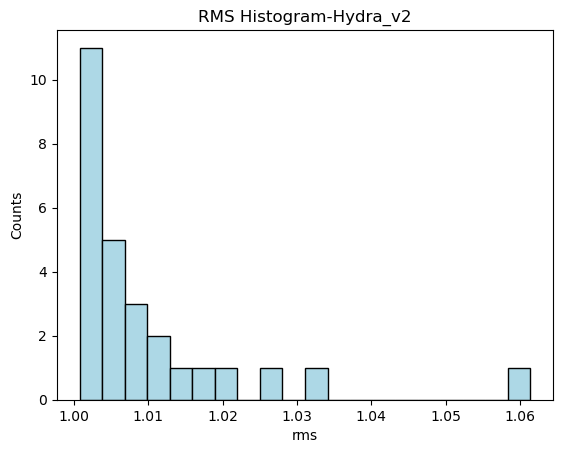

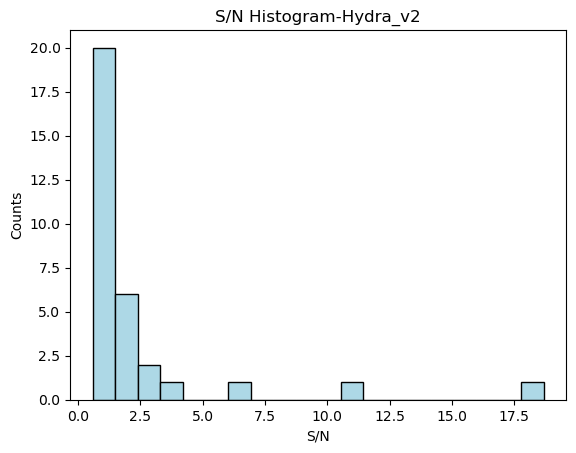

In [34]:
H1=histograms(hydrav2['rms'], 'RMS Histogram-Hydra_v2','rms')
#H2=histograms(hydrav2['S.Deviation'], 'S.Deviation Histogram-Hydra_v2',r'$\sigma$')
H3=histograms(hydrav4['S/N'],'S/N Histogram-Hydra_v2','S/N')
#H4=histograms(hydrav2['Max.noise'], 'Maximum noise Histogram-Hydra_v2','Max.noise')
#H5=histograms(hydrav2['Max.signal'], 'Maximum signal Histogram-Hydra_v2','Max.signal')
#H6=histograms(hydrav2['S.Range'], 'Spectral Range Histogram-Hydra_v2','S.Range')

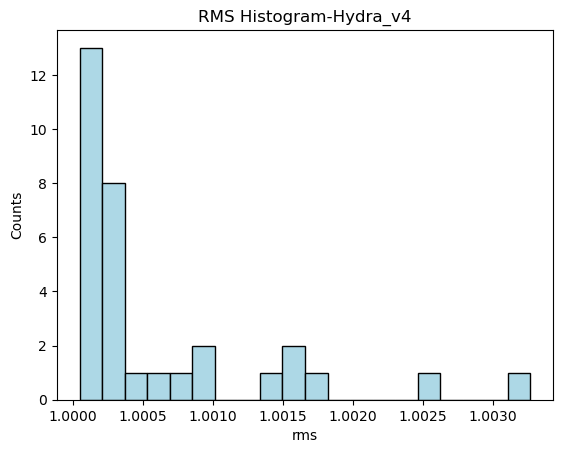

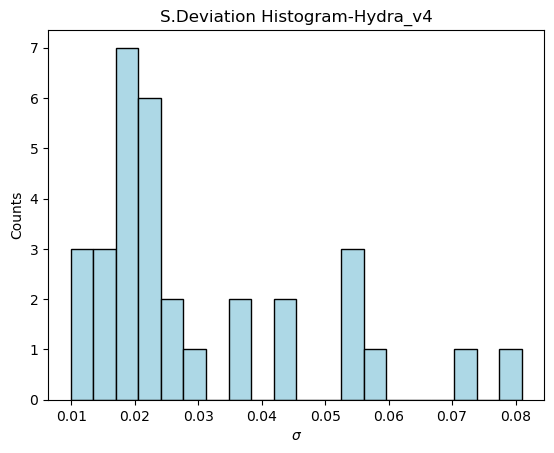

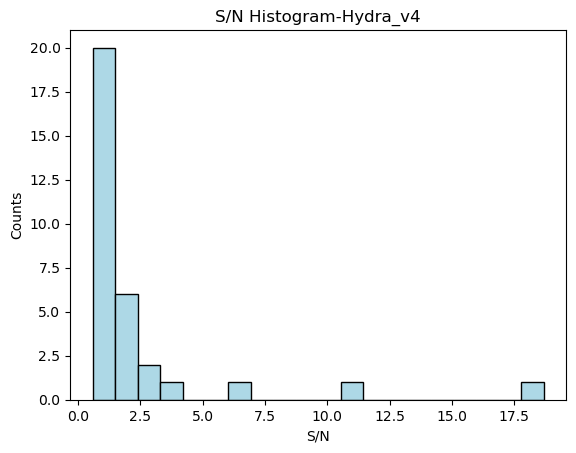

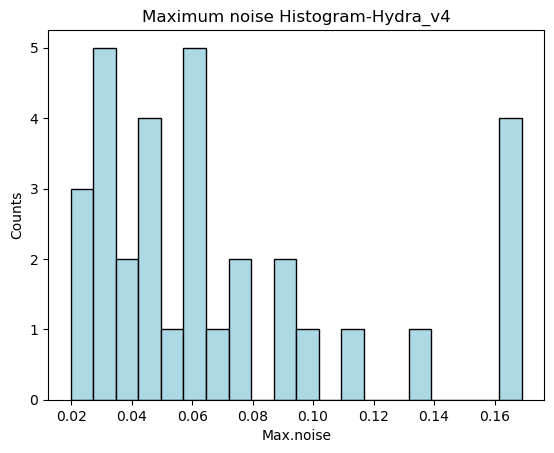

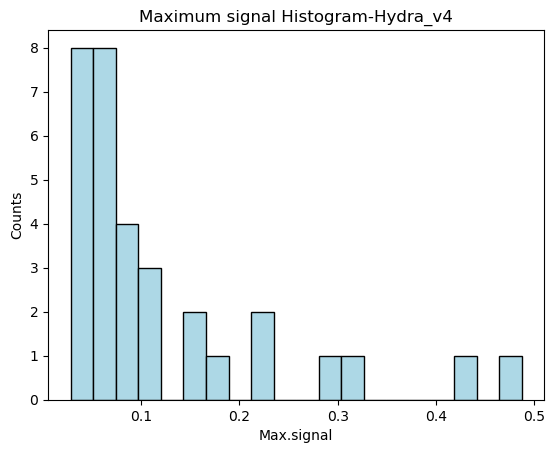

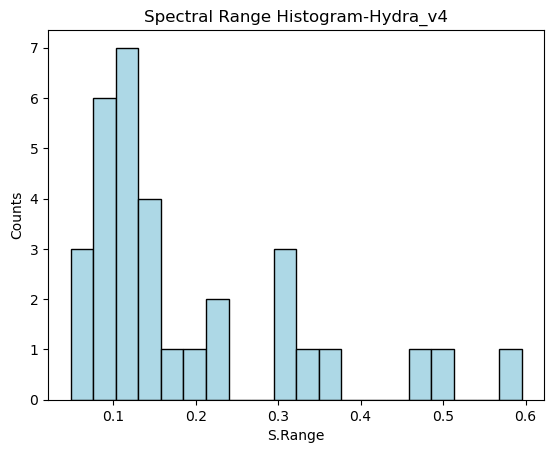

In [35]:
H7=histograms(hydrav4['rms'], 'RMS Histogram-Hydra_v4','rms')
H8=histograms(hydrav4['S.Deviation'], 'S.Deviation Histogram-Hydra_v4',r'$\sigma$')
H9=histograms(hydrav4['S/N'], 'S/N Histogram-Hydra_v4','S/N')
H10=histograms(hydrav4['Max.noise'], 'Maximum noise Histogram-Hydra_v4','Max.noise')
H11=histograms(hydrav4['Max.signal'], 'Maximum signal Histogram-Hydra_v4','Max.signal')
H12=histograms(hydrav4['S.Range'], 'Spectral Range Histogram-Hydra_v4','S.Range')

# Norma analysis

In [36]:
contenido1= os.listdir("/home/vicente/cold_hi_project/High-lat_Yachay (1)/ATCA_HI_spectra/"+key2) # to get acces to the files in the directory

In [37]:
# Clasifying the data depending on the velocity resolution
v22=[]
v44=[]
for i in contenido1:
    if "v" in i:     #Low velocities
        v22.append(i.split('.')[0]) 
    if "k" in i:     #high velocities
        v44.append(i.split('.')[0])

### 0.2 km/s velocity resolution. 

In [38]:
norma_v2 = pd.DataFrame({'Name': v22, 'rms': write(full_path(v22,key2))[0],
                   'S.Deviation':write(full_path(v22,key2))[1],
                   'S/N':write(full_path(v22,key2))[2],
                  'Max.noise':write(full_path(v22,key2))[3],
                  'Max.signal':write(full_path(v22,key2))[4],
                  'S.Range':write(full_path(v22,key2))[5],
                        'T_cont':write(full_path(v22,key2))[6],
                         'tau':write(full_path(v22,key2))[7],
                        'velocity':write(full_path(v22,key2))[8]})

norma_v2.to_pickle("Information_Norma_v2.pkl")

### 4 km/s velocity resolution. 

In [39]:
norma_v4 = pd.DataFrame({'Name': v44, 'rms': write(full_path(v44,key2))[0],
                   'S.Deviation':write(full_path(v44,key2))[1],
                   'S/N':write(full_path(v44,key2))[2],
                  'Max.noise':write(full_path(v44,key2))[3],
                  'Max.signal':write(full_path(v44,key2))[4],
                  'S.Range':write(full_path(v44,key2))[5],
                        'T_cont':write(full_path(v44,key2))[6],
                         'tau':write(full_path(v44,key2))[7],
                        'velocity':write(full_path(v44,key2))[8]})

norma_v4.to_pickle("Information_Norma_v4.pkl")

In [40]:
normav2= pd.read_pickle("Information_Norma_v2.pkl")

In [41]:
normav4= pd.read_pickle("Information_Norma_v4.pkl")

## Histograms Norma

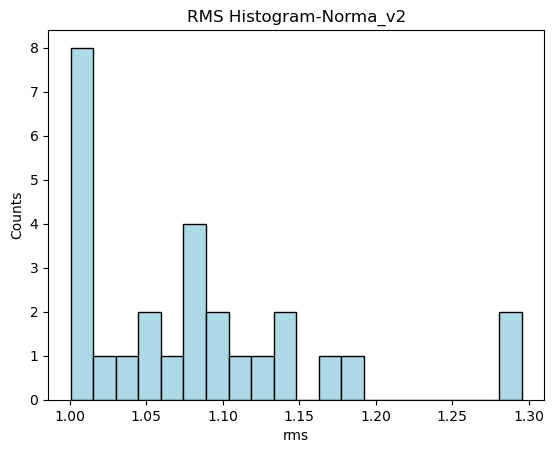

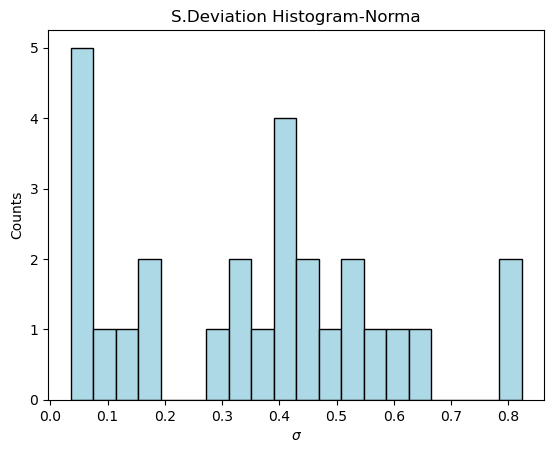

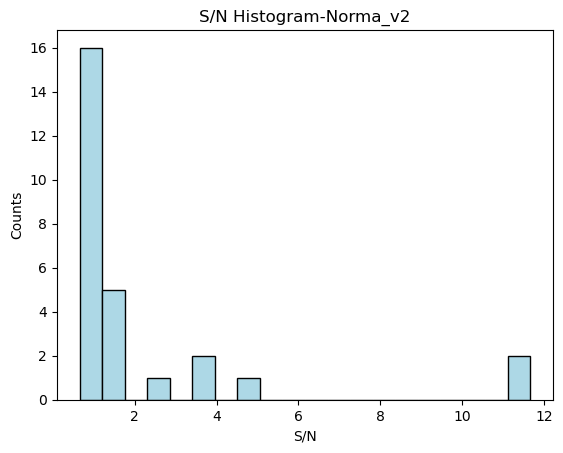

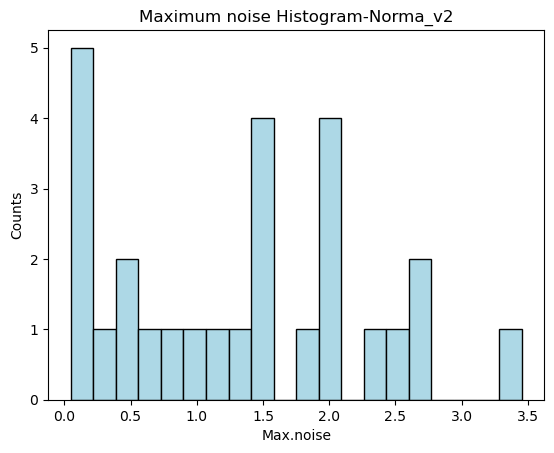

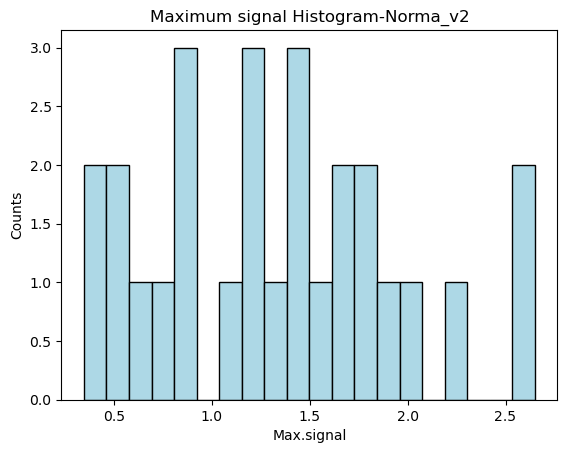

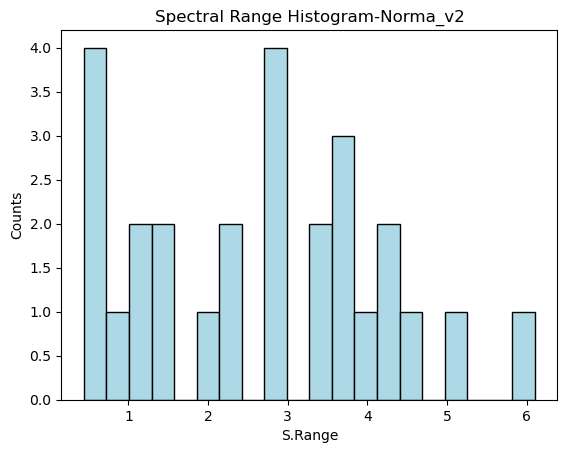

In [42]:
N1=histograms(normav2['rms'], 'RMS Histogram-Norma_v2','rms')
N2=histograms(normav2['S.Deviation'], 'S.Deviation Histogram-Norma',r'$\sigma$')
N3=histograms(normav2['S/N'], 'S/N Histogram-Norma_v2','S/N')
N4=histograms(normav2['Max.noise'], 'Maximum noise Histogram-Norma_v2','Max.noise')
N5=histograms(normav2['Max.signal'], 'Maximum signal Histogram-Norma_v2','Max.signal')
N6=histograms(normav2['S.Range'], 'Spectral Range Histogram-Norma_v2','S.Range')

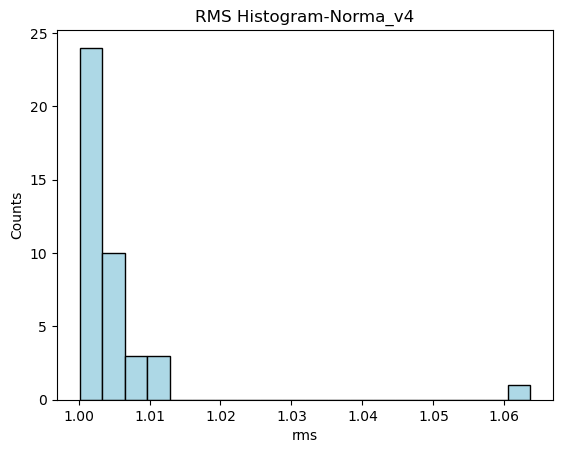

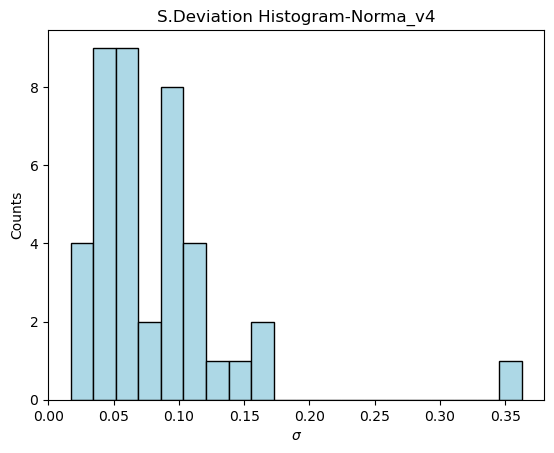

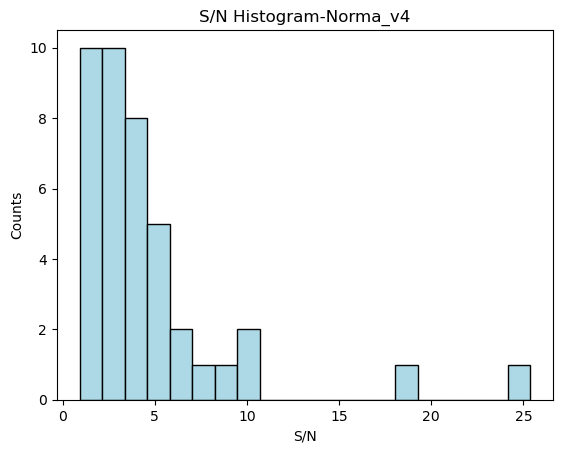

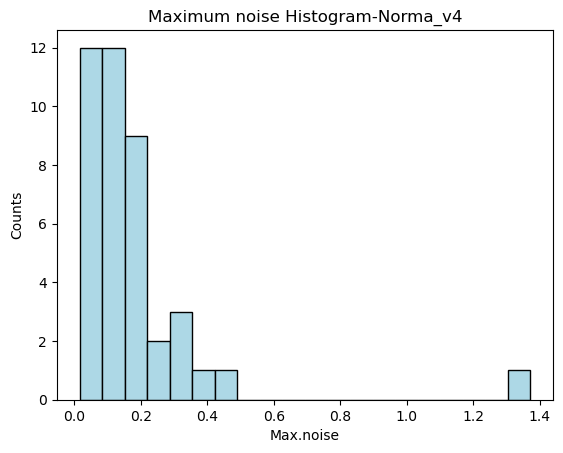

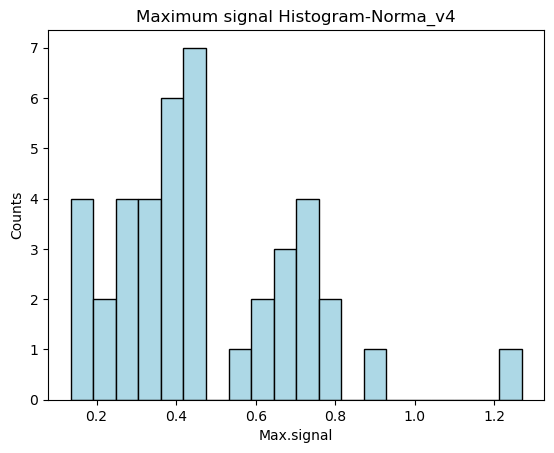

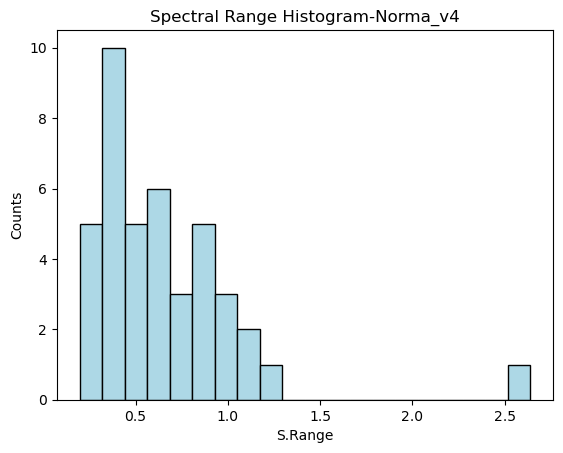

In [44]:
N7=histograms(normav4['rms'], 'RMS Histogram-Norma_v4','rms')
N8=histograms(normav4['S.Deviation'], 'S.Deviation Histogram-Norma_v4',r'$\sigma$')
N9=histograms(normav4['S/N'], 'S/N Histogram-Norma_v4','S/N')
N10=histograms(normav4['Max.noise'], 'Maximum noise Histogram-Norma_v4','Max.noise')
N11=histograms(normav4['Max.signal'], 'Maximum signal Histogram-Norma_v4','Max.signal')
N12=histograms(normav4['S.Range'], 'Spectral Range Histogram-Norma_v4','S.Range')